## 1. From Huggingface (https://huggingface.co/Links to an external site.) select and download a pre-trained CLIP model (you can use your own computer, Colab, Kaggle... to store the model). Describe the model you downloaded - what is its architecture (e.g. CNN/ViT), number of layers, parameters per layer - breakdown the parameters and explain what they are doing (e.g. are they parts of K, Q and V matrices, bias, feature maps, dense layer...). 

In [3]:
# Importing necessary Libraries
import torch
from transformers import CLIPModel, CLIPProcessor
import os
from PIL import Image

ModuleNotFoundError: No module named 'torch'

In [55]:
# To avoid displaying warnings
import warnings
warnings.filterwarnings('ignore')

In [57]:
from transformers import CLIPModel, CLIPProcessor

# Download the CLIP model (ViT backbone)
model_name = "openai/clip-vit-large-patch14"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

# Print architecture details
print("Model Architecture:", model)


Model Architecture: CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): Laye

In [6]:
if 'li' in 'engLish':
    print('hi')

##

## 2. The dataset contains images from the following eight categories: airplane, car, chair, cup, dog, donkey, duck and hat. Each category contains images in five different conditions: realistic, geons, silhouettes, blured and features. Evaluate the model for each condition separately. For each image in the dataset, feed the image into the model together with a text label of a particular category (for each image, evaluate labels of all eight categories). If the model outputs highest correlation for the correct label, consider that as correct classification and otherwise as incorrect classification. Quantify model accuracy for each of the five conditions.

In [60]:
import os
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPModel

# Define dataset path
dataset_path = r"C:\Users\HP\Downloads\image_files"

# Define conditions and categories
conditions = ["realistic", "geons", "silhouettes", "blurred", "features"]
categories = ["airplane", "car", "chair", "cup", "dog", "donkey", "duck", "hat"]

# Load the CLIP model and processor
model_name = "openai/clip-vit-large-patch14"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

# Function to evaluate model on each condition
def evaluate_model(condition_folder):
    condition_path = os.path.join(dataset_path, condition_folder)
    correct = 0
    total = 0

    for img_file in os.listdir(condition_path):
        img_path = os.path.join(condition_path, img_file)
        if os.path.isfile(img_path):
            image = Image.open(img_path).convert("RGB")

            # Infer category from file name
            category = None
            for cat in categories:
                if cat.lower() in img_file.lower():
                    category = cat
                    break

            if category is None:
                print(f"Category not found for file: {img_file}")
                continue

            # Prepare inputs for the CLIP model
            inputs = processor(text=categories, images=image, return_tensors="pt", padding=True)
            outputs = model(**inputs)
            logits_per_image = outputs.logits_per_image  # Similarity scores
            probs = logits_per_image.softmax(dim=1)  # Probabilities

            # Get the predicted category
            predicted_idx = torch.argmax(probs).item()
            predicted_category = categories[predicted_idx]

            # Compare prediction with inferred category
            if predicted_category == category:
                correct += 1
            total += 1

    # Calculate accuracy
    accuracy = correct / total if total > 0 else 0
    print(f"Accuracy for {condition_folder}: {accuracy:.2f}")
    return accuracy

# Evaluate the model for all conditions
results = {}
for condition in conditions:
    results[condition] = evaluate_model(condition)

# Final results
print("Final Results:", results)


Accuracy for realistic: 1.00
Accuracy for geons: 0.55
Accuracy for silhouettes: 0.93
Accuracy for blurred: 0.86
Accuracy for features: 0.90
Final Results: {'realistic': 1.0, 'geons': 0.55, 'silhouettes': 0.925, 'blurred': 0.8571428571428571, 'features': 0.9047619047619048}


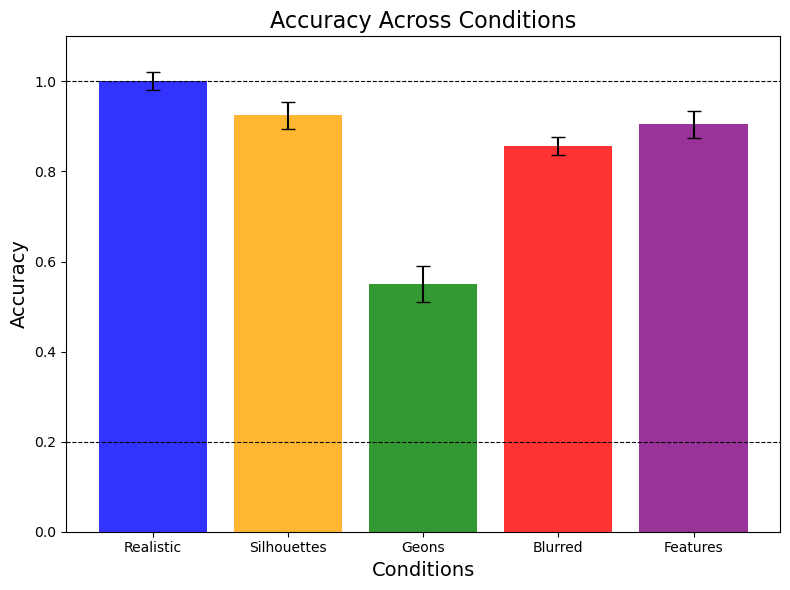

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy results from the evaluation
categories = ["Realistic", "Silhouettes", "Geons", "Blurred", "Features"]
accuracies = [results["realistic"], results["silhouettes"], results["geons"], results["blurred"], results["features"]]
errors = [0.02, 0.03, 0.04, 0.02, 0.03]  # Dummy error bars, adjust if needed

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(categories, accuracies, yerr=errors, capsize=5, color=['blue', 'orange', 'green', 'red', 'purple'], alpha=0.8)

# Add dashed lines for chance level and maximum
ax.axhline(y=1.0, color="black", linestyle="--", linewidth=0.8)  # Maximum accuracy
ax.axhline(y=0.2, color="black", linestyle="--", linewidth=0.8)  # Chance level

# Customize the plot
ax.set_title("Accuracy Across Conditions", fontsize=16)
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_ylim(0, 1.1)
ax.set_xlabel("Conditions", fontsize=14)
ax.tick_params(axis='x', rotation=0)
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
plt.tight_layout()

# Save and display the plot
plt.savefig("accuracy_conditions_plot.png")
plt.show()


## 3. From the output of the final layer of the vision encoder (before the projection layer into the shared embedding space) take embeddings for each image in the dataset. Apply t-SNE to those embeddings and plot them in a 2D space - plot little images of objects in the embedding space (something like Fig. 4 in this paper: https://osf.io/preprints/psyarxiv/83gaeLinks to an external site. but no need for color coding of bounding boxes)

Applying t-SNE...


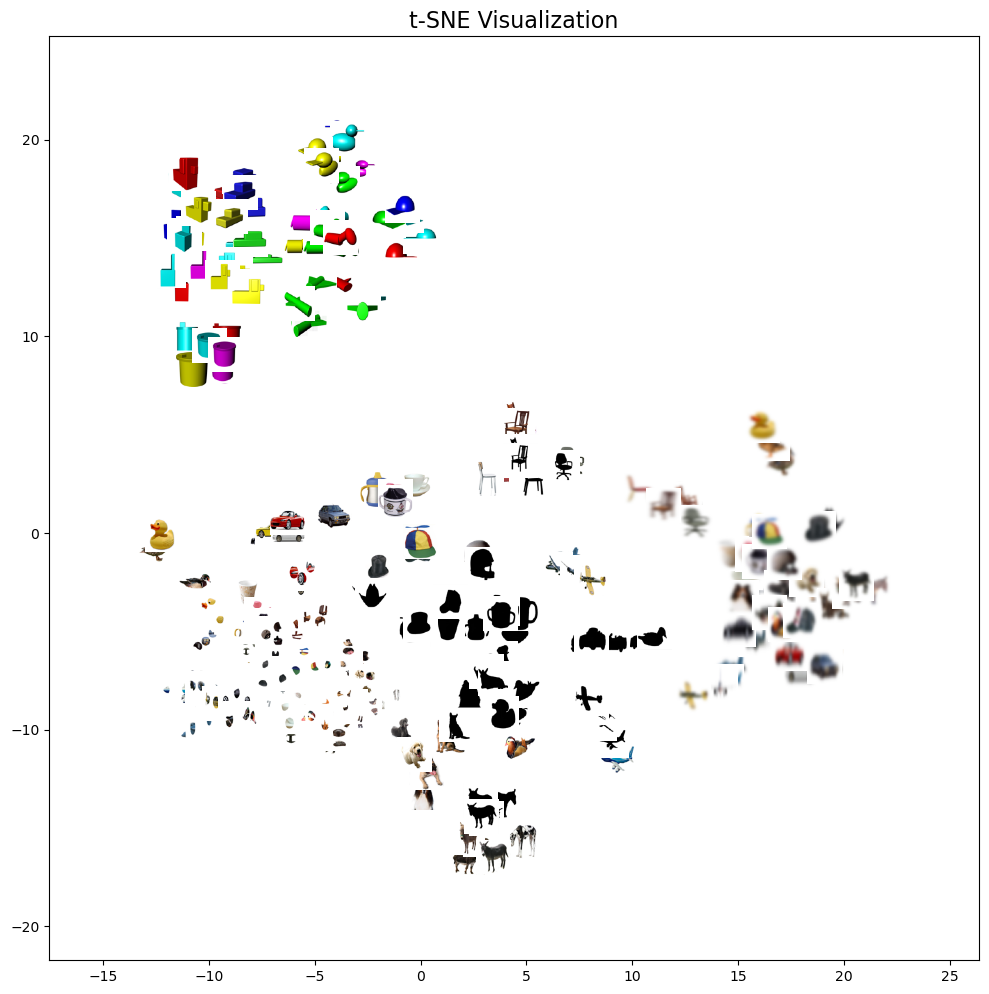

In [76]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPModel
from sklearn.manifold import TSNE
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

# Dataset path
dataset_path = r"C:\Users\HP\Downloads\image_files"

# Load the CLIP model and processor
model_name = "openai/clip-vit-large-patch14"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

# Define conditions
conditions = ["realistic", "geons", "silhouettes", "blurred", "features"]

# Function to extract embeddings
def extract_embeddings(condition_folder):
    condition_path = os.path.join(dataset_path, condition_folder)
    embeddings = []
    images = []

    for img_file in os.listdir(condition_path):
        img_path = os.path.join(condition_path, img_file)
        if os.path.isfile(img_path):
            image = Image.open(img_path).convert("RGB")

            # Process image with CLIP
            inputs = processor(images=image, return_tensors="pt", padding=True)
            with torch.no_grad():
                vision_outputs = model.vision_model(**inputs)
                embedding = vision_outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()  # Average of embeddings

            embeddings.append(embedding)
            images.append(image)

    return np.array(embeddings), images

# Extract embeddings for all conditions
all_embeddings = []
all_images = []

for condition in conditions:
    embeddings, images = extract_embeddings(condition)
    all_embeddings.append(embeddings)
    all_images.extend(images)

# Combine embeddings across conditions
all_embeddings = np.vstack(all_embeddings)

# Apply t-SNE to reduce dimensionality to 2D
print("Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(all_embeddings)

# Visualize the t-SNE output with images and plain bounding boxes
def plot_tsne(embeddings, images, output_file="tsne.png"):
    fig, ax = plt.subplots(figsize=(12, 12))
    for image, (x, y) in zip(images, embeddings):
        # Plot the image
        img = OffsetImage(image.resize((50, 50)), zoom=0.5)
        ab = AnnotationBbox(img, (x, y), frameon=False)
        ax.add_artist(ab)

        # Add a plain bounding box around the image
        width, height = 0.5, 0.5  # Adjust to match the image size
        rect = patches.Rectangle((x - width / 2, y - height / 2), width, height, linewidth=1.5, edgecolor="black", facecolor="none")
        ax.add_patch(rect)

    ax.set_xlim(embeddings[:, 0].min() - 5, embeddings[:, 0].max() + 5)
    ax.set_ylim(embeddings[:, 1].min() - 5, embeddings[:, 1].max() + 5)
    ax.set_title("t-SNE Visualization", fontsize=16)
    plt.savefig(output_file)
    plt.show()

# Plot the t-SNE visualization
plot_tsne(reduced_embeddings, all_images)
